# NAVER_NEWS 기사 분석(한글)

# 1. 전처리

In [1]:
import pandas as pd
import numpy as np
import os

from pprint import pprint

from datetime import datetime

from sklearn.feature_extraction.text import CountVectorizer

# komoran 분석기
from konlpy.tag import Komoran

# Data visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
%matplotlib inline

# 내가 정의한 함수
from morphemeAnalysis2 import get_sentences, get_pos_tags, get_NNG_NNP_words, display_features

In [2]:
# matplotlib 한글 폰트 설정
plt.rcParams["font.family"] = "NanumGothic"

## 1-2. Featrue 개수 설정

In [3]:
my_max_feature=30
my_max_feature

30

## 1-3. 데이터 추출 및 형태소 분리

### 논문 파일 READ

In [4]:
current_path=os.getcwd()
current_path

'/workspace/BBYY_PROJECT/Dayea/Doctor/text mining'

In [5]:
df = pd.read_excel(
    current_path + '/data/kr_11_20.xlsx'
    #, index_col = 0
    , sheet_name = 'Sheet1'
)

#df=df.loc[:,['Abstract']]
df.head(10)

,title,abstract,year
0,군 장병의 성희롱인식에 영향을 미치는 요인,"군대는 위계질서가 강하고 폐쇄적인 특성으로 인해 성희롱이 빈번하게 발생하지만, 문제...",2019
1,학생운동선수를 위한 스포츠 성폭력 인식 평가영역 개발,본 연구의 목적은 학생운동선수들을 위한 스포츠 성폭력 인식 평가영역을 개발하는 데 ...,2020
2,문화예술계 성 인권 보호를 위한 제도 연구,본 연구는 미투 운동 이후 시작된 문화예술계 성 인권 보호 제도의 흐름을 점검하고 ...,2020
3,정부 부처의 교육관련 사업의 성인지적 분석과 효율성 제고 방안,Ⅰ. 서론 연구의 필요성과 목적 - 성인지예산제도는 양적 성장과 더불어 법·제도...,2016
4,미래여성인재 육성정책 개선방안,1. 연구개요 가. 연구목적 미래여성인재 육성정책은 관리직과 전문직에 여성진출을 확...,2016
5,성인지예산 대상사업 운용실태 및 개선방안 연구,1. 연구목적 성인지예산제도는 정부 재정운영에 성인지적 개념과 원리를 도입하여 ...,2016
6,성평등 관점에서의 여학생 체육 정책 분석,"최근 여성주의 관점에서 성평등의 문제는 동일성(sameness), 차이(differ...",2014
7,젠더 관점에서 바라본 체육수업의 불평등 현상 탐구,스포츠를 교육내용의 근간으로 삼는 체육수업에서 교사는 학생들의 젠더 문제를 언제나 ...,2011
8,젠더론과 여성스포츠 -올림픽경기 중심으로-,이 연구는 젠더론을 배경으로 스포츠에서 남녀의 생물학적인 신체적 차이는 인정하지만 ...,2012
9,여성 스포츠리더 교육이 성인지 감수성에 미치는 영향,"이 연구는 여성 스포츠리더 교육이 성인지 감수성(젠더의식, 양성평등의식)에 미치는 ...",2019


In [6]:
#df=df.loc[:,['title','content']]
df=df.loc[:,['title','abstract']]
df.head(10)

,title,abstract
0,군 장병의 성희롱인식에 영향을 미치는 요인,"군대는 위계질서가 강하고 폐쇄적인 특성으로 인해 성희롱이 빈번하게 발생하지만, 문제..."
1,학생운동선수를 위한 스포츠 성폭력 인식 평가영역 개발,본 연구의 목적은 학생운동선수들을 위한 스포츠 성폭력 인식 평가영역을 개발하는 데 ...
2,문화예술계 성 인권 보호를 위한 제도 연구,본 연구는 미투 운동 이후 시작된 문화예술계 성 인권 보호 제도의 흐름을 점검하고 ...
3,정부 부처의 교육관련 사업의 성인지적 분석과 효율성 제고 방안,Ⅰ. 서론 연구의 필요성과 목적 - 성인지예산제도는 양적 성장과 더불어 법·제도...
4,미래여성인재 육성정책 개선방안,1. 연구개요 가. 연구목적 미래여성인재 육성정책은 관리직과 전문직에 여성진출을 확...
5,성인지예산 대상사업 운용실태 및 개선방안 연구,1. 연구목적 성인지예산제도는 정부 재정운영에 성인지적 개념과 원리를 도입하여 ...
6,성평등 관점에서의 여학생 체육 정책 분석,"최근 여성주의 관점에서 성평등의 문제는 동일성(sameness), 차이(differ..."
7,젠더 관점에서 바라본 체육수업의 불평등 현상 탐구,스포츠를 교육내용의 근간으로 삼는 체육수업에서 교사는 학생들의 젠더 문제를 언제나 ...
8,젠더론과 여성스포츠 -올림픽경기 중심으로-,이 연구는 젠더론을 배경으로 스포츠에서 남녀의 생물학적인 신체적 차이는 인정하지만 ...
9,여성 스포츠리더 교육이 성인지 감수성에 미치는 영향,"이 연구는 여성 스포츠리더 교육이 성인지 감수성(젠더의식, 양성평등의식)에 미치는 ..."


### Title 과 Abstract 를 합쳐서 my_data 칼럼 생성

In [7]:
#df['my_data'] = df['title'] + ". \n" + df['content'] # Title과 Abstract 사이에 공백(" ")을 넣는다.
df['my_data'] = df['abstract']
df.head()

,title,abstract,my_data
0,군 장병의 성희롱인식에 영향을 미치는 요인,"군대는 위계질서가 강하고 폐쇄적인 특성으로 인해 성희롱이 빈번하게 발생하지만, 문제...","군대는 위계질서가 강하고 폐쇄적인 특성으로 인해 성희롱이 빈번하게 발생하지만, 문제..."
1,학생운동선수를 위한 스포츠 성폭력 인식 평가영역 개발,본 연구의 목적은 학생운동선수들을 위한 스포츠 성폭력 인식 평가영역을 개발하는 데 ...,본 연구의 목적은 학생운동선수들을 위한 스포츠 성폭력 인식 평가영역을 개발하는 데 ...
2,문화예술계 성 인권 보호를 위한 제도 연구,본 연구는 미투 운동 이후 시작된 문화예술계 성 인권 보호 제도의 흐름을 점검하고 ...,본 연구는 미투 운동 이후 시작된 문화예술계 성 인권 보호 제도의 흐름을 점검하고 ...
3,정부 부처의 교육관련 사업의 성인지적 분석과 효율성 제고 방안,Ⅰ. 서론 연구의 필요성과 목적 - 성인지예산제도는 양적 성장과 더불어 법·제도...,Ⅰ. 서론 연구의 필요성과 목적 - 성인지예산제도는 양적 성장과 더불어 법·제도...
4,미래여성인재 육성정책 개선방안,1. 연구개요 가. 연구목적 미래여성인재 육성정책은 관리직과 전문직에 여성진출을 확...,1. 연구개요 가. 연구목적 미래여성인재 육성정책은 관리직과 전문직에 여성진출을 확...


In [8]:
len(df)

44

In [9]:
df = df.dropna(subset=['my_data'], how='any', axis=0)
#df.head(10)
len(df)

44

### 초록(Abstract) list 변환 및 Data cleaning

In [10]:
my_data_list=list()

#for sentence in df["Abstract"].unique() :
#for sentence in df["my_data"].unique() :
for sentence in df["my_data"] :
    my_data_list.append(get_sentences(sentence)) # morphemeAnalysis.py 에 있는 get_sentences 에서 문장 단위 데이터 클리닝
my_data_list[:10]

['군대는 위계질서가 강하고 폐쇄적인 특성으로 인해 성희롱이 빈번하게 발생하지만, 문제제기가 가장 어려운 집단이라고 할 수 있다. 이에 국방부는 다각도의 대응방안을 제시하지만 대부분이 성폭력에 중점을 두고 있으며, 국방부 차원에서의 실태조사는 이루어지지 않았다. 본 연구는 군 장병의 성희롱에 대한 인식에 영향을 주는 영향요인을 분석하여 군 장병의 성희롱 인식을 개선할 방안을 모색코자 하였다. 499명의 군장병이 참여한 설문조사 결과, 일상적 긴장이 높을수록, 음주/회식이 잦을수록 성희롱에 대한 인식은 낮았으며, 성평등 의식이 높을수록, 공감능력이 높을수록 성희롱에 대한 인식은 강한 것으로 분석되었다. 연구결과를 토대로 군장병의 일상적 긴장을 낮추기 위한 건전한 여가활동 시행, 성평등 의식을 강화할 교육 프로그램 개발, 공감능력을 높이기 위한 음악/미술/스포츠를 활용한 프로그램의 도입과 시행, 군 장병들의 의견을 고려한 건전한 음주/회식문화 활성화 방안 수립 등이 제안되었다.',
 '본 연구의 목적은 학생운동선수들을 위한 스포츠 성폭력 인식 평가영역을 개발하는 데 있다. 구체적으로는 성폭력 인식과 관련된 선행연구 고찰을 통해 성폭력 인식 평가요소들을 탐색하고, 학생운동선수에게 적합한 새로운 평가영역 및 세부 평가요인을 제안하고자 하였다. 이를 위해 국내 초, 중, 고 대학생들을 대상으로 한 성폭력 인식 관련 문헌들을 분석하여 개략적인 성폭력 인식 평가요인들을 탐색하였으며, 전문가 집단을 대상으로 한 FGI 분석을 실시하여 스포츠 성폭력 인식 평가영역 및 세부 구성개념들을 도출하였다. 분석 결과, 학생선수의 스포츠 성폭력 인식 평가영역은 크게 성폭력 문제 인식, 성폭력 상황 인지, 성폭력 예방 및 대처, 성평등 의식의 네 가지 영역으로 나타났으며, 각각의 평가영역 을 구성하는 13개의 세부 평가요인이 도출되었다.',
 '본 연구는 미투 운동 이후 시작된 문화예술계 성 인권 보호 제도의 흐름을 점검하고 이에 대한 개선 방향을 제안하는 것을 목표로 한다. 그동안 정부

In [11]:
len(my_data_list)

44

In [12]:
tmp_my_data_list = list()
for my_data in my_data_list :
    my_data = my_data.replace('\n','').replace('\t','').replace('\r','')
    tmp_my_data_list.append(my_data)

my_data_list = tmp_my_data_list

### 한글을 포함한 단어 추출

In [13]:
from kornounextractor.noun_extractor import extract

korean_noun_set = set()

for content in my_data_list :
    my_content=extract(content, freq=2)
    if len( my_content ) > 0 :
        #print( sorted(my_content) )
        korean_noun_set.update(my_content)
        if len ( korean_noun_set ) :
            korean_noun_set.discard("co")
            korean_noun_set.discard("https")
korean_noun_set

{'DB',
 'FIFA',
 'HP',
 'IPA',
 'IX',
 'NKMS',
 'Tamburrini',
 'Tannsjo',
 'Title',
 'WK리그',
 'gender',
 'sexual',
 '平價切下',
 '가부장',
 '가정',
 '가족',
 '가치',
 '갈등',
 '감독',
 '감독교사',
 '감소',
 '감수성',
 '강기영',
 '강조',
 '강화',
 '개념',
 '개발',
 '개별',
 '개선',
 '개선방안',
 '개인',
 '개정',
 '객관',
 '건강',
 '건강불평등',
 '건강생활실천',
 '건강정책',
 '검토',
 '격차',
 '견고',
 '결과',
 '결승',
 '결승전',
 '결혼',
 '경기',
 '경기장',
 '경험',
 '계획',
 '고등교육',
 '고등교육기관',
 '고려',
 '고용',
 '고용노동부',
 '고용특성',
 '고용환경',
 '고정관념',
 '고찰',
 '공감능력',
 '공공기관',
 '공유',
 '공통',
 '과정',
 '과제',
 '관계',
 '관심',
 '관점',
 '관중',
 '관행',
 '교과서',
 '교과태도',
 '교구',
 '교사',
 '교사편향성',
 '교육',
 '교육내용',
 '교육방식',
 '교육부',
 '교육효과',
 '구분',
 '구성',
 '구성원',
 '구조',
 '구체',
 '구축',
 '국가',
 '국가건강정책',
 '국내',
 '국민체육진흥법',
 '국방부',
 '국제무대',
 '국제심판',
 '국회',
 '군장병',
 '궁극',
 '권력관계',
 '권리',
 '권세영',
 '규범',
 '규정',
 '규칙',
 '극복',
 '근거',
 '근거이론',
 '근로자',
 '근본',
 '근원',
 '근접중심성',
 '긍정',
 '기능',
 '기반',
 '기술',
 '기술교과',
 '기술교육',
 '기준',
 '기초',
 '기타',
 '기타교육',
 '긴장',
 '김경희',
 '김기범',
 '김석기',
 '김주엽',
 '나약',
 '남녀',
 '남녀간',
 '남녀평등

### 한글 사전 생성

In [14]:
# NNG : 일반 명사
# NNP : 고유 명사
    
with open('user_dictionary.txt', 'w', encoding='utf8') as f:
    for word in korean_noun_set :
        f.write(word + ' NNG\n')

    f.write("로지스틱회귀분석 NNG\n")
    f.write("다중로지스틱회귀분석 NNG\n")
    f.write("여성노인 NNG\n")
    f.write("종속변인 NNG\n")
    f.write("고령화 NNG\n")
    f.write("장애 NNG\n")
    f.write("장애인 NNG\n")
    f.write("실험집단 NNG\n")
    f.write("비교집단 NNG\n")
    f.write("통제집단 NNG\n")
    f.write("한국 NNG\n") 
    f.write("치매예방프로그램 NNG\n")
    f.write("신체활동프로그램 NNG\n")
    f.write("치매 NNG\n")
    f.write("신체활동 NNG\n")
    f.write("바나나 NNG\n")
    f.write("미디어 NNG\n")

### 형태소 분리

In [15]:
komoran = Komoran(userdic="user_dictionary.txt")

morphs_list=get_pos_tags(komoran, my_data_list)
morphs_list[:10] #섬망 : 섬망은 신체 질환이나, 약물, 술 등으로 인해 뇌의 전반적인 기능장애가 발생하는 증후군

[[('군대', 'NNG'),
  ('는', 'JX'),
  ('위계질서', 'NNG'),
  ('가', 'JKS'),
  ('강하', 'VA'),
  ('고', 'EC'),
  ('폐쇄', 'NNG'),
  ('적', 'XSN'),
  ('이', 'VCP'),
  ('ㄴ', 'ETM'),
  ('특성', 'NNG'),
  ('으로', 'JKB'),
  ('인해', 'NNP'),
  ('성희롱', 'NNP'),
  ('이', 'JKS'),
  ('빈번', 'XR'),
  ('하', 'XSA'),
  ('게', 'EC'),
  ('발생', 'NNG'),
  ('하', 'XSV'),
  ('지만', 'EC'),
  (',', 'SP'),
  ('문제', 'NNG'),
  ('제기', 'NNG'),
  ('가', 'JKS'),
  ('가장', 'MAG'),
  ('어렵', 'VA'),
  ('ㄴ', 'ETM'),
  ('집단', 'NNG'),
  ('이', 'VCP'),
  ('라고', 'EC'),
  ('하', 'VV'),
  ('ㄹ', 'ETM'),
  ('수', 'NNB'),
  ('있', 'VX'),
  ('다', 'EF'),
  ('.', 'SF'),
  ('이', 'NP'),
  ('에', 'JKB'),
  ('국방부', 'NNP'),
  ('는', 'JX'),
  ('다각도', 'NNG'),
  ('의', 'JKG'),
  ('대응', 'NNG'),
  ('방안', 'NNG'),
  ('을', 'JKO'),
  ('제시', 'NNG'),
  ('하', 'XSV'),
  ('지만', 'EC'),
  ('대부분', 'NNG'),
  ('이', 'JKS'),
  ('성폭력', 'NNP'),
  ('에', 'JKB'),
  ('중점', 'NNG'),
  ('을', 'JKO'),
  ('두', 'VV'),
  ('고', 'EC'),
  ('있', 'VV'),
  ('으며', 'EC'),
  (',', 'SP'),
  ('국방부', 'NNP'),
  ('차원', 

### 불용어 리스트 파일 READ

In [16]:
stop_words_list_file=open( current_path + "/stop_words_list.txt", 'r', encoding='utf-8' )
stop_words_list=list()

for stop_word in stop_words_list_file.readlines():
    stop_words_list.append(stop_word.strip())
stop_words_list_file.close()
stop_words_list[:10]

['%', '>', '<', '=', '!', '@', '#', '$', '%', '^']

### 불용어를 제외한 명사 추출

In [17]:
NN_words = get_NNG_NNP_words(morphs_list, stop_words_list)
#NN_words = get_words(morphs_list, stop_words_list)

#NN_words[:10]

In [18]:
len(NN_words)

44

In [19]:
NN_words[:5]

[['군대',
  '위계질서',
  '폐쇄',
  '특성',
  '인해',
  '성희롱',
  '발생',
  '제기',
  '집단',
  '국방부',
  '다각도',
  '대응',
  '방안',
  '제시',
  '대부분',
  '성폭력',
  '중점',
  '국방부',
  '차원',
  '실태',
  '장병',
  '성희롱',
  '인식',
  '장병',
  '성희롱',
  '인식',
  '개선',
  '방안',
  '모색',
  '장병',
  '설문',
  '일상',
  '긴장',
  '음주',
  '회식',
  '성희롱',
  '인식',
  '평등',
  '공감',
  '능력',
  '성희롱',
  '인식',
  '토대',
  '장병',
  '일상',
  '긴장',
  '여가',
  '활동',
  '시행',
  '평등',
  '교육 프로그램',
  '개발',
  '공감',
  '능력',
  '음악',
  '미술',
  '스포츠',
  '활용',
  '프로그램',
  '도입',
  '시행',
  '장병',
  '의견',
  '고려',
  '음주',
  '회식',
  '문화',
  '활성',
  '방안',
  '수립',
  '제안'],
 ['학생',
  '운동선수',
  '스포츠',
  '성폭력',
  '인식',
  '평가',
  '영역',
  '개발',
  '구체',
  '성폭력',
  '인식',
  '선행',
  '고찰',
  '성폭력',
  '인식',
  '평가',
  '요소',
  '탐색',
  '학생',
  '운동선수',
  '평가',
  '영역',
  '세부',
  '평가',
  '제안',
  '국내',
  '대학생',
  '성폭력',
  '인식',
  '문헌',
  '개략',
  '성폭력',
  '인식',
  '평가',
  '탐색',
  '전문가',
  '집단',
  '스포츠',
  '성폭력',
  '인식',
  '평가',
  '영역',
  '세부',
  '개념',
  '도출',
  '학생',
  '선수',
  '스포츠',
  '성폭력',
  '

### 논문별 명사 공백 구분 처리

In [20]:
NN_words_converted=[]

for abstract in NN_words :
    #print( ",".join(abstract) )
    #NN_words_converted.append( ",".join(abstract) )
    NN_words_converted.append( " ".join(abstract) )
NN_words_converted[:10]

['군대 위계질서 폐쇄 특성 인해 성희롱 발생 제기 집단 국방부 다각도 대응 방안 제시 대부분 성폭력 중점 국방부 차원 실태 장병 성희롱 인식 장병 성희롱 인식 개선 방안 모색 장병 설문 일상 긴장 음주 회식 성희롱 인식 평등 공감 능력 성희롱 인식 토대 장병 일상 긴장 여가 활동 시행 평등 교육 프로그램 개발 공감 능력 음악 미술 스포츠 활용 프로그램 도입 시행 장병 의견 고려 음주 회식 문화 활성 방안 수립 제안',
 '학생 운동선수 스포츠 성폭력 인식 평가 영역 개발 구체 성폭력 인식 선행 고찰 성폭력 인식 평가 요소 탐색 학생 운동선수 평가 영역 세부 평가 제안 국내 대학생 성폭력 인식 문헌 개략 성폭력 인식 평가 탐색 전문가 집단 스포츠 성폭력 인식 평가 영역 세부 개념 도출 학생 선수 스포츠 성폭력 인식 평가 영역 성폭력 인식 성폭력 상황 인지 성폭력 예방 대처 평등 영역 각각 평가 영역 세부 평가 도출',
 '미투 운동 문화예술 인권 보호 제도 흐름 점검 개선 방향 제안 목표 정부 정부 합동 대책 문화예술 성희롱 성폭력 조사단 권고 문화 체육 관광부 성희롱 성폭력 예방 대책 위원회 권고 문화 비전 발표 토대 문화예술 인권 보호 제도 설계 시행 제도 구체 피해자 보호 가해자 제재 예방 방지책 마련 근거 제도 개선 범주 분류 정부 다각 노력 현장 제도 실효 비판 제기 피해 당사자 목소리 평등 문화 정책 진척 지금 현장 변화 현행 제도 진단 개선 방향 논의 시점 정부 발간 기반 문헌 정책 기획 실행 단계 행위자 인터뷰 바탕 면접 진행 인터뷰 질적 연구 프로그램 활용 제도 범주 문제점 문제 해결 인터뷰 제시 개선 방향 연관 관계 확인 인권 보호 제도 유기 연결 효과 시사',
 '서론 인지 예산 제도 성장 제도 측면 정책 기반 제도 선진 인지 예산 제도 시행 가시 제도 실효 지적 인해 실효 제도 오인 제도 도입 상기 시점 정부 예산 효율 성별 형평 제고 정부 예산 사업 평가 성인 지적 접근 정부 예산 성별 고려 형평 증대 인지 예산 제도 제도 성별 수혜 격

# 2. Document-Term-Matrix

## 2-1. 문서별 단어 빈도수 산출(CountVectorizer)

In [21]:
count_model=CountVectorizer(
    ngram_range=(1,1), 
    max_features=my_max_feature, # 출력하는 최대 단어수
    stop_words=stop_words_list,
)
count_model

CountVectorizer(max_features=30,
                stop_words=['%', '>', '<', '=', '!', '@', '#', '$', '%', '^',
                            '&', '*', '(', ')', '+', '-', '_', '~', ',', '.',
                            '/', '\\', '|', '{', '}', '[', ']', '?', '`', '05', ...])

In [22]:
DTM=count_model.fit_transform(NN_words_converted)
DTM

/usr/local/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['01', 'co', 'jtbc', 'kr', 'mbc뉴스', 'methods', 'motivation', 'motivatuon', 'news1', 'participants', '경제', '기사', '김현정의', '뉴스쇼', '레터', '범주', '연합뉴스tv', '영상', '오전', '이달', '정치', '클릭', '포토'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


<44x30 sparse matrix of type '<class 'numpy.int64'>'
	with 437 stored elements in Compressed Sparse Row format>

In [23]:
#list(count_model.get_feature_names_out())
count_model.get_feature_names()[:my_max_feature]

['감독',
 '개선',
 '건강',
 '경험',
 '관점',
 '교사',
 '교육',
 '남성',
 '문화',
 '불평등',
 '사업',
 '사회',
 '선수',
 '스포츠',
 '심판',
 '양성평등',
 '여성',
 '역할',
 '예산',
 '인식',
 '인지',
 '정책',
 '제도',
 '제시',
 '젠더',
 '지도자',
 '차별',
 '체육',
 '평등',
 '활동']

In [24]:
DTM_arr=DTM.toarray()

display_features(DTM.todense(), count_model.get_feature_names())

    감독  개선  건강  경험  관점  교사  교육  남성  문화  불평등  ...  인지  정책  제도  제시  젠더  지도자  차별  \
0    0   1   0   0   0   0   1   0   1    0  ...   0   0   0   1   0    0   0   
1    0   0   0   0   0   0   0   0   0    0  ...   1   0   0   0   0    0   0   
2    0   4   0   0   0   0   0   0   3    0  ...   0   2   8   1   0    0   0   
3    0   0   0   0   0   0  44   0   1    0  ...  11   3  12   1   0    0   0   
4    0   4   0   0   0   0  10   0   1    0  ...   0  18   0   0   0    0   0   
5    0   2   0   0   0   0   1   0   1    1  ...  16   2  11   1   0    0   0   
6    0   0   0   0   5   0   7   1   3    1  ...   0   2   1   1   1    0   0   
7    0   0   0   5   3   1   1   0   0    7  ...   0   0   0   0  15    0   0   
8    0   0   0   0   1   0   1   1   0    0  ...   0   0   0   0   2    0   1   
9    0   0   0   0   0   0  18   0   0    0  ...   3   0   0   0   3    0   0   
10   0   0   0   0   0   0   0   0   0    1  ...   0   0   0   0   1    0   0   
11   0   0   0   0   7   0  

## 2-2. 전체 문서 기준 단어 빈도수 산출

DTM 을 column 기준으로 합계를 내면 feature(단어)별로 모든 문서에서 출현한 빈도 계산 가능

In [25]:
count=DTM_arr.sum(axis=0)
count

array([ 39,  34,  32,  40,  42,  48, 122,  89,  48,  43,  79,  66,  58,
       126, 125,  43, 275,  42,  35,  42,  32,  53,  40,  32,  77,  44,
        36, 104,  48,  40])

In [26]:
idx=np.argsort(-count) # 배열(array) 내 데이터를 정렬한다. 리턴하는 값은 value 기준 정렬한 결과의 index array를 리턴한다.
                       # -count ==> descending order...
idx

array([16, 13, 14,  6, 27,  7, 10, 24, 11, 12, 21,  8, 28,  5, 25,  9, 15,
        4, 19, 17, 22, 29,  3,  0, 26, 18,  1, 23,  2, 20])

In [27]:
count=count[idx]
count

array([275, 126, 125, 122, 104,  89,  79,  77,  66,  58,  53,  48,  48,
        48,  44,  43,  43,  42,  42,  42,  40,  40,  40,  39,  36,  35,
        34,  32,  32,  32])

In [28]:
feature_name=np.array(count_model.get_feature_names())[idx]
feature_name

array(['여성', '스포츠', '심판', '교육', '체육', '남성', '사업', '젠더', '사회', '선수', '정책',
       '문화', '평등', '교사', '지도자', '불평등', '양성평등', '관점', '인식', '역할', '제도',
       '활동', '경험', '감독', '차별', '예산', '개선', '제시', '건강', '인지'], dtype='<U4')

In [29]:
len( feature_name )

30

In [30]:
word_count = list(zip(feature_name, count))
word_count[:my_max_feature]

[('여성', 275),
 ('스포츠', 126),
 ('심판', 125),
 ('교육', 122),
 ('체육', 104),
 ('남성', 89),
 ('사업', 79),
 ('젠더', 77),
 ('사회', 66),
 ('선수', 58),
 ('정책', 53),
 ('문화', 48),
 ('평등', 48),
 ('교사', 48),
 ('지도자', 44),
 ('불평등', 43),
 ('양성평등', 43),
 ('관점', 42),
 ('인식', 42),
 ('역할', 42),
 ('제도', 40),
 ('활동', 40),
 ('경험', 40),
 ('감독', 39),
 ('차별', 36),
 ('예산', 35),
 ('개선', 34),
 ('제시', 32),
 ('건강', 32),
 ('인지', 32)]

In [31]:
import operator

word_count = sorted(             # 정렬
    word_count,
    key=operator.itemgetter(1),  # 1번째(빈도)를 기준으로
    reverse=True    # 내림차순으로
)             

word_count[:my_max_feature]

[('여성', 275),
 ('스포츠', 126),
 ('심판', 125),
 ('교육', 122),
 ('체육', 104),
 ('남성', 89),
 ('사업', 79),
 ('젠더', 77),
 ('사회', 66),
 ('선수', 58),
 ('정책', 53),
 ('문화', 48),
 ('평등', 48),
 ('교사', 48),
 ('지도자', 44),
 ('불평등', 43),
 ('양성평등', 43),
 ('관점', 42),
 ('인식', 42),
 ('역할', 42),
 ('제도', 40),
 ('활동', 40),
 ('경험', 40),
 ('감독', 39),
 ('차별', 36),
 ('예산', 35),
 ('개선', 34),
 ('제시', 32),
 ('건강', 32),
 ('인지', 32)]

In [32]:
now = datetime.now()
now_str=now.strftime("%m-%d-%Y-%H:%M:%S")
now_str

'02-27-2024-23:17:25'

In [33]:
word_frequency_data=pd.DataFrame(
    data=word_count, 
    columns=["단어","빈도수"]
)
word_frequency_data["단어"]=word_frequency_data["단어"].astype(str)
word_frequency_data.to_excel(current_path + "/result/" + 'word_count_naver_21_22' + now_str + ".xlsx")
word_frequency_data.head(my_max_feature)

,단어,빈도수
0,여성,275
1,스포츠,126
2,심판,125
3,교육,122
4,체육,104
5,남성,89
6,사업,79
7,젠더,77
8,사회,66
9,선수,58


In [34]:
dict(word_count).keys()

dict_keys(['여성', '스포츠', '심판', '교육', '체육', '남성', '사업', '젠더', '사회', '선수', '정책', '문화', '평등', '교사', '지도자', '불평등', '양성평등', '관점', '인식', '역할', '제도', '활동', '경험', '감독', '차별', '예산', '개선', '제시', '건강', '인지'])

## 2-3. Word cloud

(-0.5, 599.5, 499.5, -0.5)

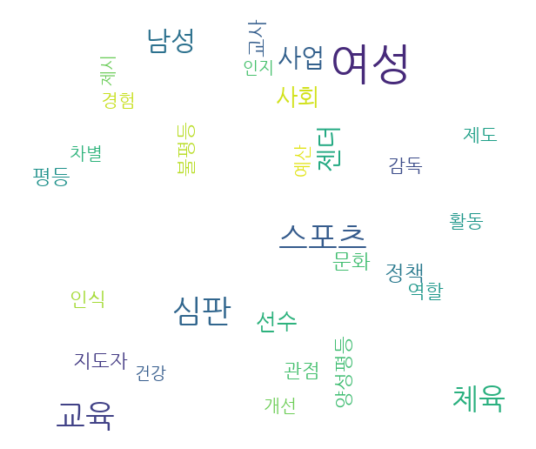

In [35]:
from wordcloud import WordCloud
from matplotlib import rc


FONT_PATH = '/usr/share/fonts/NanumFont/NanumGothic.ttf'
#my_font_prop = fm.FontProperties(fname=FONT_PATH, size=12)


wc = WordCloud(
    max_font_size=50, 
    relative_scaling=.5, 
    font_path=FONT_PATH,
    background_color='white', 
    width=600, 
    height=500
)

cloud = wc.fit_words(dict(word_count))

plt.figure(figsize=(10,8))
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")

# 3. Semantic network analysis

## 3-1. Co-occurence matrix 동시출현 행열

In [36]:
C_O_M = (DTM.T * DTM) # this is co-occurrence matrix in sparse csr format
C_O_M.setdiag(0) # sometimes you want to fill same word cooccurence to 0
C_O_M.todense() # print out matrix in dense format

matrix([[   0,  140,    0,  191,  115,  980,  107,  431,  669,   37,
            0,  220,  170,  154,  259,    0, 1170,  568,    0,  249,
            0,    6,    2,  140,    0,  102,    4,  105,    2,   22],
        [ 140,    0,   32,   36,   17,  117,   68,   74,  104,   24,
          102,   66,   37,  103,    4,   23,  353,   72,   32,   58,
           32,  105,   65,   34,   47,   26,   25,   79,   35,   13],
        [   0,   32,    0,    0,    0,   12,   29,  116,    0,  154,
           58,   29,    0,    0,    0,    3,  203,   64,    0,   32,
            0,  435,    0,   58,  319,    0,   21,    9,    0,  151],
        [ 191,   36,    0,    0,   46,  160,   35,  330,  129,   83,
            0,  196,  132,  216,  801,   12,  712,  105,    0,   74,
            0,   16,    3,   25,  250,  152,   14,   95,   17,   88],
        [ 115,   17,    0,   46,    0,  110,   85,   74,  103,   36,
            0,   93,   26,   91,    3,   42,  168,   71,    0,   34,
            0,   30,   17,   2

In [37]:
TCM_df=pd.DataFrame(
    C_O_M.todense() , 
    columns=count_model.get_feature_names(),
    index=count_model.get_feature_names()
)
TCM_df

,감독,개선,건강,경험,관점,교사,교육,남성,문화,불평등,...,인지,정책,제도,제시,젠더,지도자,차별,체육,평등,활동
감독,0,140,0,191,115,980,107,431,669,37,...,0,6,2,140,0,102,4,105,2,22
개선,140,0,32,36,17,117,68,74,104,24,...,32,105,65,34,47,26,25,79,35,13
건강,0,32,0,0,0,12,29,116,0,154,...,0,435,0,58,319,0,21,9,0,151
경험,191,36,0,0,46,160,35,330,129,83,...,0,16,3,25,250,152,14,95,17,88
관점,115,17,0,46,0,110,85,74,103,36,...,0,30,17,22,66,22,14,181,98,15
교사,980,117,12,160,110,0,156,320,542,53,...,0,0,0,123,20,66,49,162,26,21
교육,107,68,29,35,85,156,0,68,146,25,...,556,347,565,98,90,31,29,260,232,57
남성,431,74,116,330,74,320,68,0,288,118,...,0,109,1,75,316,442,94,83,90,282
문화,669,104,0,129,103,542,146,288,0,55,...,27,39,53,88,54,106,19,162,49,19
불평등,37,24,154,83,36,53,25,118,55,0,...,16,81,13,36,249,78,29,151,31,54


## 3-2. 중심성(Centrality) 분석

networkx 라이브러리를 활용하여 임의의 그래프(단어 네트워크)를 생성하고, 생성한 그래프를 기준으로 다양한 중심성에 따라 노드(단어)들을 구별하여 색을 부여 한다.

In [38]:
TCM_df.stack() 
# df.stack(level=- 1, dropna=True)
# level : MultiColumns의 경우 하위 인덱스로 변환할 열의 레벨입니다. 기본값은 -1로 최하위 레벨이 선택됩니다. 
# dropna : {True / False} 기본값은 True로 피벗화로인해 생성된 하위인덱스의 모든 값이 결측치(NaN)인 경우 해당 열이 제거됩니다.

감독  감독       0
    개선     140
    건강       0
    경험     191
    관점     115
          ... 
활동  지도자    199
    차별      30
    체육      82
    평등      19
    활동       0
Length: 900, dtype: int64

최소 동시출현빈도수 설정

In [39]:
co_occurrence_freq = 100
co_occurrence_freq

100

In [40]:
TCM_df_edge_list = TCM_df.stack()

#reshape and filter only count >= co_occurrence_freq
TCM_df_edge_list = TCM_df_edge_list[TCM_df_edge_list >= co_occurrence_freq].rename_axis(('source', 'target')).reset_index(name='weight')
TCM_df_edge_list.head(my_max_feature)

,source,target,weight
0,감독,개선,140
1,감독,경험,191
2,감독,관점,115
3,감독,교사,980
4,감독,교육,107
5,감독,남성,431
6,감독,문화,669
7,감독,사회,220
8,감독,선수,170
9,감독,스포츠,154


### 3-2-1. 단순 그래프

In [41]:
import networkx as nx

G = nx.from_pandas_edgelist(TCM_df_edge_list,  edge_attr=True)
nx.to_dict_of_dicts(G)
#{'a': {'b': {'weight': 1}, 'd': {'weight': 1}}, 
# 'b': {'a': {'weight': 1}, 'c': {'weight': 1}, 'd': {'weight': 1}, 'e': {'weight': 2}}, 
# 'd': {'a': {'weight': 1}, 'b': {'weight': 1}, 'c': {'weight': 1}, 'e': {'weight': 1}}, 
# 'c': {'b': {'weight': 1}, 'd': {'weight': 1}, 'e': {'weight': 1}}, 
# 'e': {'b': {'weight': 2}, 'c': {'weight': 1}, 'd': {'weight': 1}}}

{'감독': {'개선': {'weight': 140},
  '경험': {'weight': 191},
  '관점': {'weight': 115},
  '교사': {'weight': 980},
  '교육': {'weight': 107},
  '남성': {'weight': 431},
  '문화': {'weight': 669},
  '사회': {'weight': 220},
  '선수': {'weight': 170},
  '스포츠': {'weight': 154},
  '심판': {'weight': 259},
  '여성': {'weight': 1170},
  '역할': {'weight': 568},
  '인식': {'weight': 249},
  '제시': {'weight': 140},
  '지도자': {'weight': 102},
  '체육': {'weight': 105}},
 '개선': {'감독': {'weight': 140},
  '교사': {'weight': 117},
  '문화': {'weight': 104},
  '사업': {'weight': 102},
  '스포츠': {'weight': 103},
  '여성': {'weight': 353},
  '정책': {'weight': 105}},
 '경험': {'감독': {'weight': 191},
  '교사': {'weight': 160},
  '남성': {'weight': 330},
  '문화': {'weight': 129},
  '사회': {'weight': 196},
  '선수': {'weight': 132},
  '스포츠': {'weight': 216},
  '심판': {'weight': 801},
  '여성': {'weight': 712},
  '역할': {'weight': 105},
  '젠더': {'weight': 250},
  '지도자': {'weight': 152}},
 '관점': {'감독': {'weight': 115},
  '교사': {'weight': 110},
  '문화': {'weight'

의미 연결망(단어 네트워크) 생성(spring_layout 알고리즘)

In [42]:
# create position
pos=nx.spring_layout(G, scale=0.2)
pos

{'감독': array([ 0.05050223, -0.03815463]),
 '개선': array([-0.06476553,  0.1026747 ]),
 '경험': array([0.09849094, 0.03407248]),
 '관점': array([-0.00223253, -0.18666664]),
 '교사': array([ 0.03246162, -0.05922236]),
 '교육': array([-0.10174076,  0.00876021]),
 '남성': array([0.05834112, 0.01702574]),
 '문화': array([-4.16152125e-05, -3.73490975e-02]),
 '사회': array([-0.00370765,  0.02641691]),
 '선수': array([0.06038246, 0.06226219]),
 '스포츠': array([0.02783496, 0.00907841]),
 '심판': array([0.0372762 , 0.03510597]),
 '여성': array([0.01381488, 0.01457134]),
 '역할': array([ 0.04622101, -0.06674819]),
 '인식': array([ 0.12016377, -0.05261461]),
 '제시': array([ 0.14915682, -0.15043408]),
 '지도자': array([0.01251376, 0.06351528]),
 '체육': array([-0.04199869, -0.0867117 ]),
 '사업': array([-0.1339062 ,  0.03734969]),
 '정책': array([-0.02759023,  0.06148874]),
 '건강': array([0.13515533, 0.06425428]),
 '불평등': array([ 0.11493723, -0.09097709]),
 '젠더': array([ 0.10419884, -0.01417975]),
 '활동': array([0.05086152, 0.10718056]),

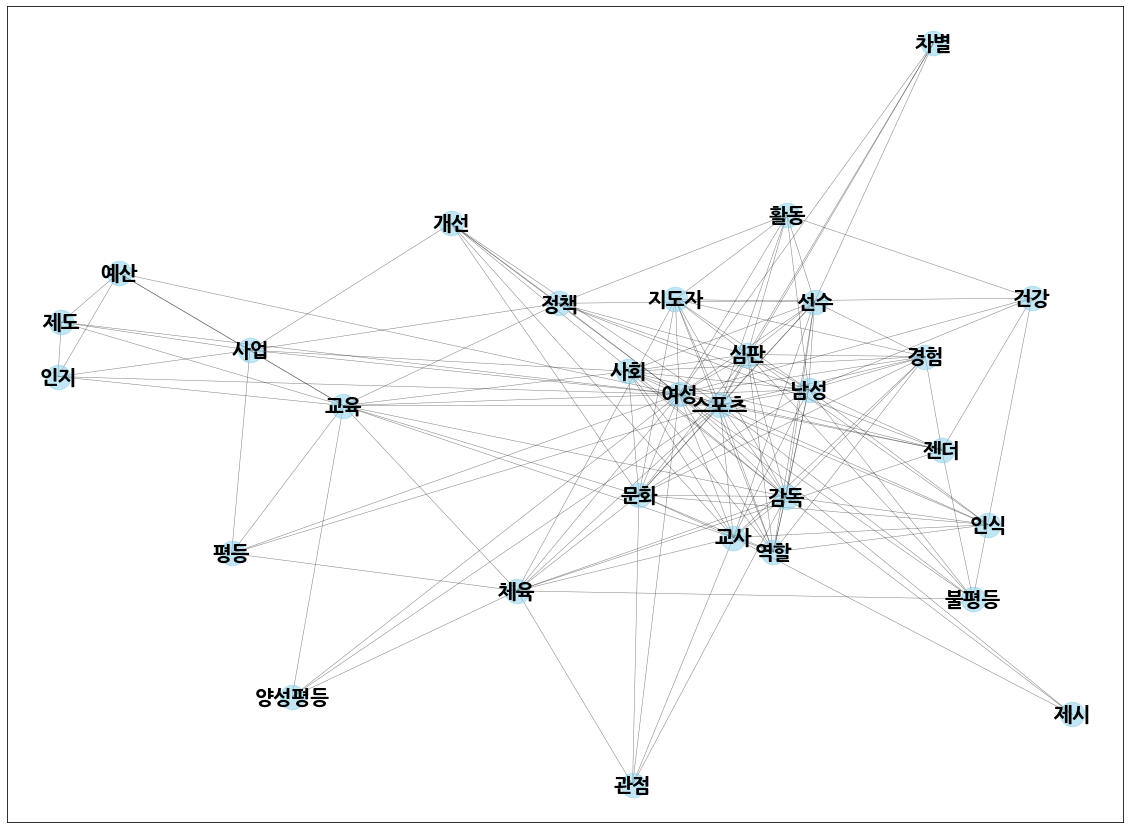

In [43]:
plt.figure(figsize=(20, 15))

my_font_prop = fm.FontProperties(fname=FONT_PATH, size=16)


nx.draw_networkx_nodes(
    G, 
    pos, 
    node_size=600, 
    node_color='skyblue',
    alpha=0.5,# node transparency
)
nx.draw_networkx_labels(
    G, 
    pos,
    font_weight='bold',
    font_color = 'black',
    font_family=my_font_prop.get_name(),
    font_size=20,
)
nx.draw_networkx_edges(
    G, 
    pos, 
    alpha=0.5,# edge transparency
    width=0.5 # width of edge(line), float or array of floats (default=1.0)
)


#nx.draw_networkx(
#    G, 
#    pos=pos,
#    node_size=300,
#    node_color='skyblue',
#    with_labels=True,
#    font_color = 'black',
#    font_family=my_font_prop.get_name(),
#    font_size=16,
#    alpha=0.5,# node & edge transparency
#    width=0.5 # width of edge(line), float or array of floats (default=1.0)
#)

### 3-2-2. circular_layout 그래프

In [44]:
pos_circular = nx.circular_layout(G, scale=0.2)   # circular layout 모양
pos_circular

{'감독': array([2.00000e-01, 2.56964e-09]),
 '개선': array([0.19562953, 0.04158234]),
 '경험': array([0.18270909, 0.08134733]),
 '관점': array([0.1618034 , 0.11755705]),
 '교사': array([0.13382611, 0.14862898]),
 '교육': array([0.09999999, 0.17320509]),
 '남성': array([0.06180339, 0.19021131]),
 '문화': array([0.02090568, 0.19890439]),
 '사회': array([-0.0209057 ,  0.19890439]),
 '선수': array([-0.06180341,  0.1902113 ]),
 '스포츠': array([-0.10000001,  0.17320508]),
 '심판': array([-0.13382614,  0.14862895]),
 '여성': array([-0.1618034 ,  0.11755705]),
 '역할': array([-0.1827091 ,  0.08134732]),
 '인식': array([-0.19562952,  0.04158232]),
 '제시': array([-2.00000000e-01, -1.49149153e-08]),
 '지도자': array([-0.19562951, -0.04158236]),
 '체육': array([-0.18270909, -0.08134734]),
 '사업': array([-0.16180339, -0.11755706]),
 '정책': array([-0.1338261 , -0.14862897]),
 '건강': array([-0.09999998, -0.17320509]),
 '불평등': array([-0.06180342, -0.19021129]),
 '젠더': array([-0.02090567, -0.19890438]),
 '활동': array([ 0.02090567, -0.1989043

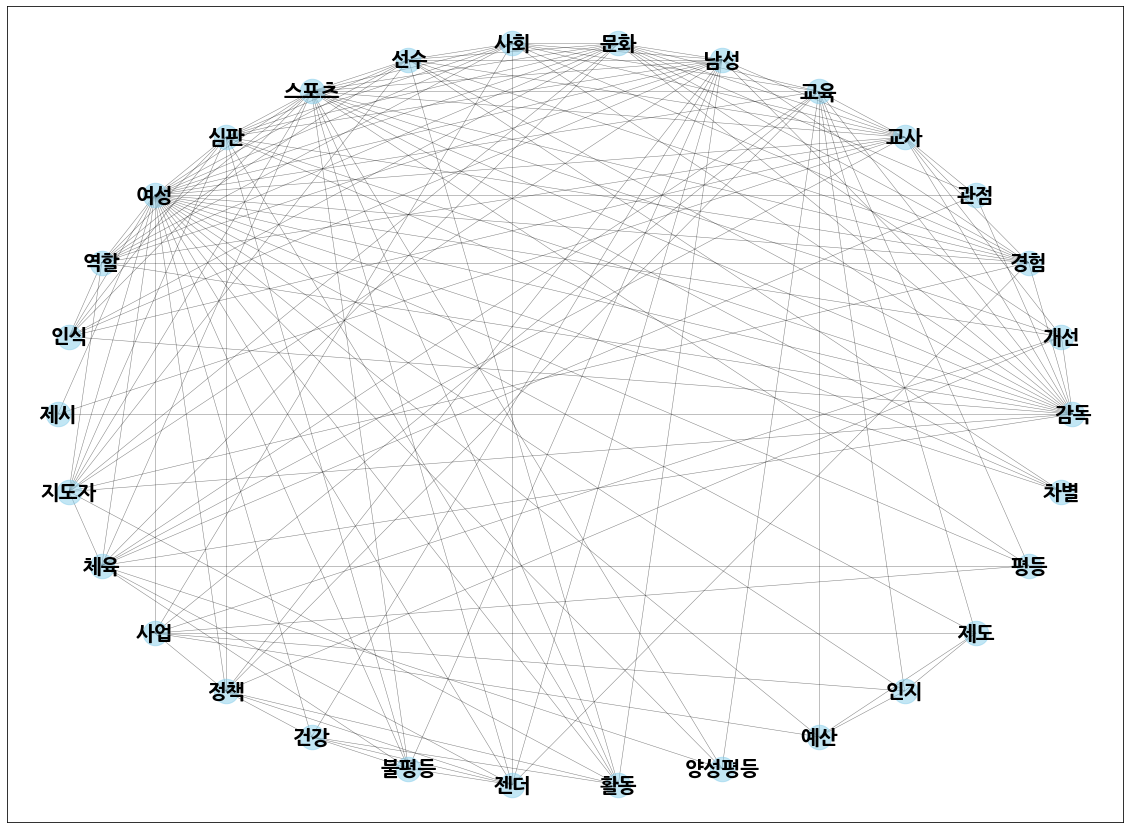

In [45]:
plt.figure(figsize=(20, 15))

my_font_prop = fm.FontProperties(fname=FONT_PATH, size=16)


nx.draw_networkx_nodes(
    G, 
    pos=pos_circular,
    node_size=600, 
    node_color='skyblue',
    alpha=0.5,# node transparency
)
nx.draw_networkx_labels(
    G, 
    pos=pos_circular,
    font_weight='bold',
    font_color = 'black',
    font_family=my_font_prop.get_name(),
    font_size=20,
)
nx.draw_networkx_edges(
    G, 
    pos=pos_circular,
    alpha=0.5,# edge transparency
    width=0.5 # width of edge(line), float or array of floats (default=1.0)
)


#nx.draw_networkx(
#    G, 
#    pos=pos_circular,
#    node_size=300,
#    node_color='skyblue',
#    with_labels=True,
#    font_color = 'black',
#    font_family=my_font_prop.get_name(),
#    #font_family='NanumGothic',
#    font_size=16,
#    alpha=0.5,# node & edge transparency
#    width=0.5 # width of edge(line), float or array of floats (default=1.0)
#)

### 3-2-3. Degree centrality

In [46]:
c_degree = nx.degree_centrality(G)
#pd.DataFrame(
#    data=list( c_degree.values() ), 
#    index=list( c_degree.keys() ), 
#    columns=["중심성"]
#).to_excel(current_path + "/result/" + "Degree centrality_dbpia_en_" + now_str + ".xlsx" )
c_degree

{'감독': 0.5862068965517241,
 '개선': 0.24137931034482757,
 '경험': 0.41379310344827586,
 '관점': 0.1724137931034483,
 '교사': 0.5172413793103449,
 '교육': 0.48275862068965514,
 '남성': 0.5862068965517241,
 '문화': 0.5517241379310345,
 '사회': 0.4482758620689655,
 '선수': 0.4482758620689655,
 '스포츠': 0.7241379310344828,
 '심판': 0.5172413793103449,
 '여성': 1.0,
 '역할': 0.41379310344827586,
 '인식': 0.27586206896551724,
 '제시': 0.10344827586206896,
 '지도자': 0.3793103448275862,
 '체육': 0.41379310344827586,
 '사업': 0.3103448275862069,
 '정책': 0.3103448275862069,
 '건강': 0.20689655172413793,
 '불평등': 0.24137931034482757,
 '젠더': 0.3103448275862069,
 '활동': 0.27586206896551724,
 '양성평등': 0.13793103448275862,
 '예산': 0.1724137931034483,
 '인지': 0.1724137931034483,
 '제도': 0.1724137931034483,
 '평등': 0.1724137931034483,
 '차별': 0.13793103448275862}

In [47]:
c_degree_df=pd.DataFrame.from_dict(
    data=c_degree
    , orient='index'
    , columns=['degree_centrality']
).sort_values(by=['degree_centrality'], ascending=False)

c_degree_df.to_excel(current_path + "/result/" + "Degree_centrality_naver_21_22" + now_str + ".xlsx" )

c_degree_df

,degree_centrality
여성,1.000000
스포츠,0.724138
감독,0.586207
남성,0.586207
문화,0.551724
심판,0.517241
교사,0.517241
교육,0.482759
사회,0.448276
선수,0.448276


Text(0.5, 1.0, 'Degree Centrality')

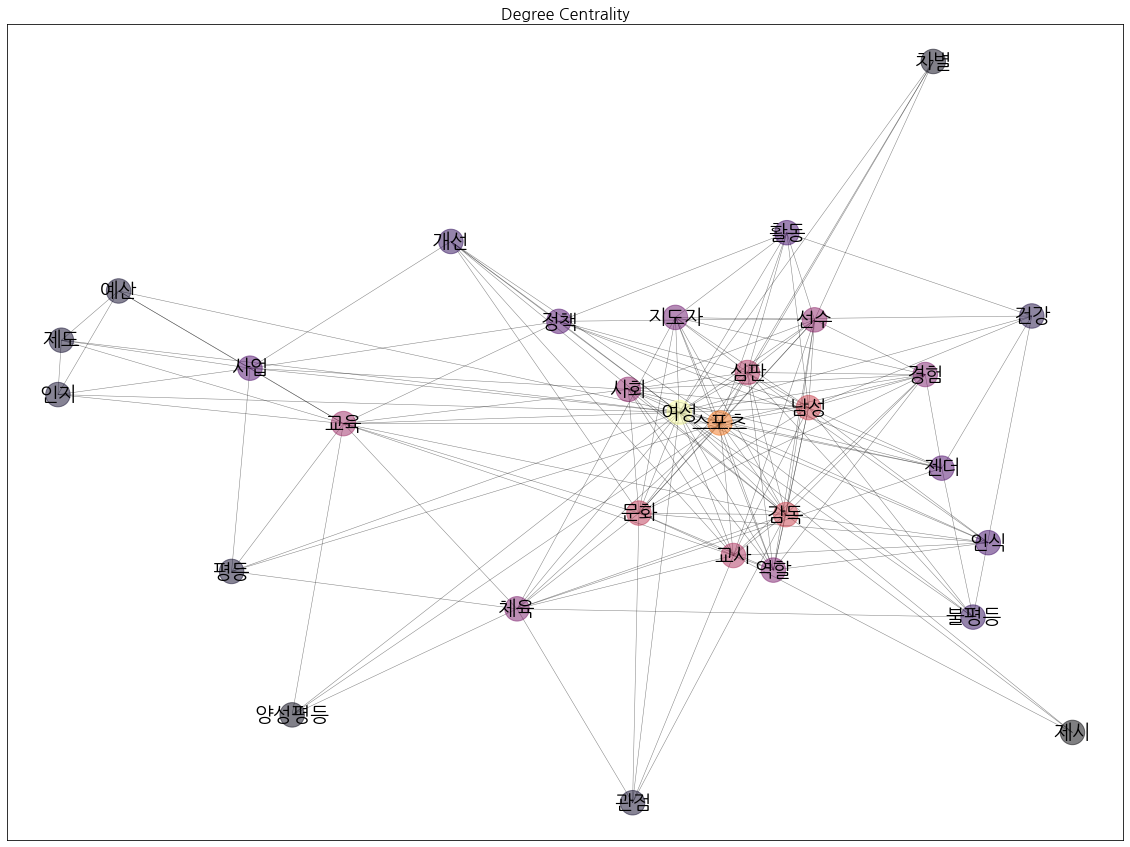

In [48]:
# Plot the centrality of the nodes
plt.figure(figsize=(20, 15))

my_font_prop = fm.FontProperties(fname=FONT_PATH, size=20)


nx.draw_networkx_nodes(
    G, 
    pos, 
    node_size=600, 
    cmap = plt.get_cmap('inferno'), 
    node_color = list(c_degree.values()),
    alpha=0.5,# node transparency
)
nx.draw_networkx_labels(
    G, 
    pos,
    #font_weight='bold',
    #font_color = 'black',
    font_family=my_font_prop.get_name(),
    font_size=20,
)
nx.draw_networkx_edges(
    G, 
    pos, 
    alpha=0.5,# edge transparency
    width=0.5 # width of edge(line), float or array of floats (default=1.0)
)


# Degree Centrality
#nx.draw(
#    G, 
#    pos=pos, 
#    cmap = plt.get_cmap('inferno'), 
#    node_color = list(c_degree.values()),
#    node_size=500, 
#    with_labels=True,
#    font_family=my_font_prop.get_name(),
#    font_size=20,
#    alpha=0.5,# node & edge transparency
#    width=0.5 # width of edge(line), float or array of floats (default=1.0)
#)


plt.title(
    'Degree Centrality', 
    size=16
)

### 3-2-4. Eigenvalue centrality

In [49]:
c_eigenvector = nx.eigenvector_centrality(G)
#pd.DataFrame(
#    data=list( c_eigenvector.values() ), 
#    index=list( c_eigenvector.keys() ), 
#    columns=["중심성"]
#).to_excel(current_path + "/result/" + "Eigenvector_centrality_dbpia_en_" + now_str + ".xlsx" )
c_eigenvector

{'감독': 0.26737250387215294,
 '개선': 0.12276086087871042,
 '경험': 0.22129891726208148,
 '관점': 0.09701324969830903,
 '교사': 0.23656439904362908,
 '교육': 0.1772364974868566,
 '남성': 0.2646844085623019,
 '문화': 0.2628758706860585,
 '사회': 0.22621860441798539,
 '선수': 0.22679834691669037,
 '스포츠': 0.3004559769177066,
 '심판': 0.23819474011308314,
 '여성': 0.34426723214952215,
 '역할': 0.22280680300417635,
 '인식': 0.16137964866343935,
 '제시': 0.06404729039577274,
 '지도자': 0.2006199622703149,
 '체육': 0.17370580012341133,
 '사업': 0.09345074157029061,
 '정책': 0.12078241746821768,
 '건강': 0.08463083761195564,
 '불평등': 0.11672523201263371,
 '젠더': 0.13990128344469707,
 '활동': 0.13443901987591556,
 '양성평등': 0.075182314708061,
 '예산': 0.054695731063061775,
 '인지': 0.054695731063061775,
 '제도': 0.054695731063061775,
 '평등': 0.08223893310755535,
 '차별': 0.08379371093777767}

In [50]:
c_eigenvector_df=pd.DataFrame.from_dict(
    data=c_eigenvector
    , orient='index'
    , columns=['eigen_value']
).sort_values(by=['eigen_value'], ascending=False)

c_eigenvector_df.to_excel(current_path + "/result/" + "Eigenvector_centrality_naver_21_22" + now_str + ".xlsx" )

c_eigenvector_df

,eigen_value
여성,0.344267
스포츠,0.300456
감독,0.267373
남성,0.264684
문화,0.262876
심판,0.238195
교사,0.236564
선수,0.226798
사회,0.226219
역할,0.222807


Text(0.5, 1.0, 'Eigenvector Centrality')

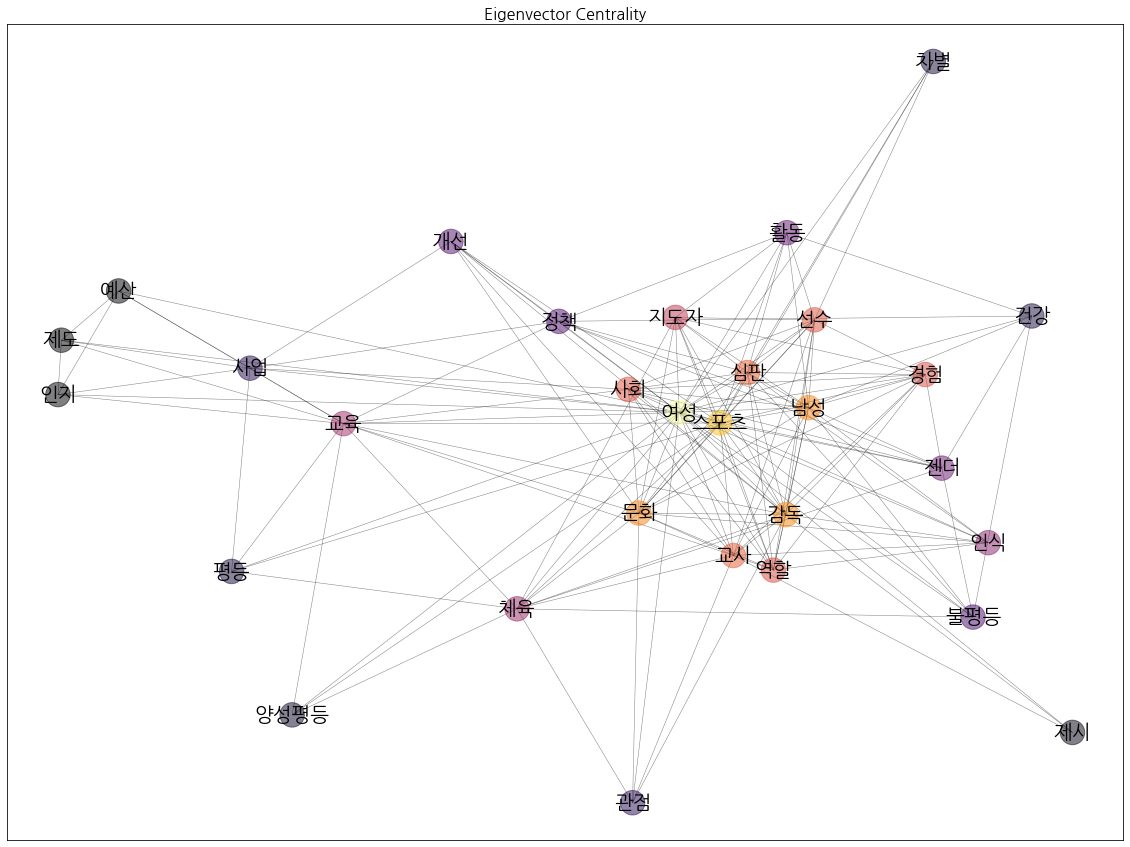

In [51]:
# Eigenvalue Centrality
plt.figure(figsize=(20, 15))

my_font_prop = fm.FontProperties(fname=FONT_PATH, size=20)



nx.draw_networkx_nodes(
    G, 
    pos, 
    node_size=600, 
    cmap = plt.get_cmap('inferno'), 
    node_color = list(c_eigenvector.values()),
    alpha=0.5,# node transparency
)
nx.draw_networkx_labels(
    G, 
    pos,
    #font_weight='bold',
    #font_color = 'black',
    font_family=my_font_prop.get_name(),
    font_size=20,
)
nx.draw_networkx_edges(
    G, 
    pos, 
    alpha=0.5,# edge transparency
    width=0.5 # width of edge(line), float or array of floats (default=1.0)
)



#nx.draw(
#    G, 
#    pos=pos, 
#    cmap = plt.get_cmap('inferno'), 
#    node_color = list(c_eigenvector.values()), 
#    node_size=500, 
#    with_labels=True,
#    font_family=my_font_prop.get_name(),
#    font_size=20,
#    alpha=0.5,# node & edge transparency
#    width=0.5 # width of edge(line), float or array of floats (default=1.0)
#)


plt.title(
    'Eigenvector Centrality', 
    size=16
)

### 3-2-5. Closeness Centrality

In [52]:
c_closeness = nx.closeness_centrality(G)
#pd.DataFrame(
#    data=list( c_closeness.values() ), 
#    index=list( c_closeness.keys() ), 
#    columns=["중심성"]
#).to_excel(current_path + "/result/" + "Closeness_centrality_dbpia_en_" + now_str + ".xlsx" )
c_closeness

{'감독': 0.7073170731707317,
 '개선': 0.5686274509803921,
 '경험': 0.6304347826086957,
 '관점': 0.5471698113207547,
 '교사': 0.6744186046511628,
 '교육': 0.6590909090909091,
 '남성': 0.7073170731707317,
 '문화': 0.6904761904761905,
 '사회': 0.6444444444444445,
 '선수': 0.6444444444444445,
 '스포츠': 0.7837837837837838,
 '심판': 0.6744186046511628,
 '여성': 1.0,
 '역할': 0.6304347826086957,
 '인식': 0.58,
 '제시': 0.5272727272727272,
 '지도자': 0.6170212765957447,
 '체육': 0.6304347826086957,
 '사업': 0.5918367346938775,
 '정책': 0.5918367346938775,
 '건강': 0.5576923076923077,
 '불평등': 0.5686274509803921,
 '젠더': 0.5918367346938775,
 '활동': 0.58,
 '양성평등': 0.5370370370370371,
 '예산': 0.5471698113207547,
 '인지': 0.5471698113207547,
 '제도': 0.5471698113207547,
 '평등': 0.5471698113207547,
 '차별': 0.5370370370370371}

In [53]:
c_closeness_df=pd.DataFrame.from_dict(
    data=c_closeness
    , orient='index'
    , columns=['closeness']
).sort_values(by=['closeness'], ascending=False)

c_closeness_df.to_excel(current_path + "/result/" + "Closeness_centrality_naver_21_22" + now_str + ".xlsx" )

c_closeness_df

,closeness
여성,1.000000
스포츠,0.783784
감독,0.707317
남성,0.707317
문화,0.690476
심판,0.674419
교사,0.674419
교육,0.659091
사회,0.644444
선수,0.644444


Text(0.5, 1.0, 'Closeness Centrality')

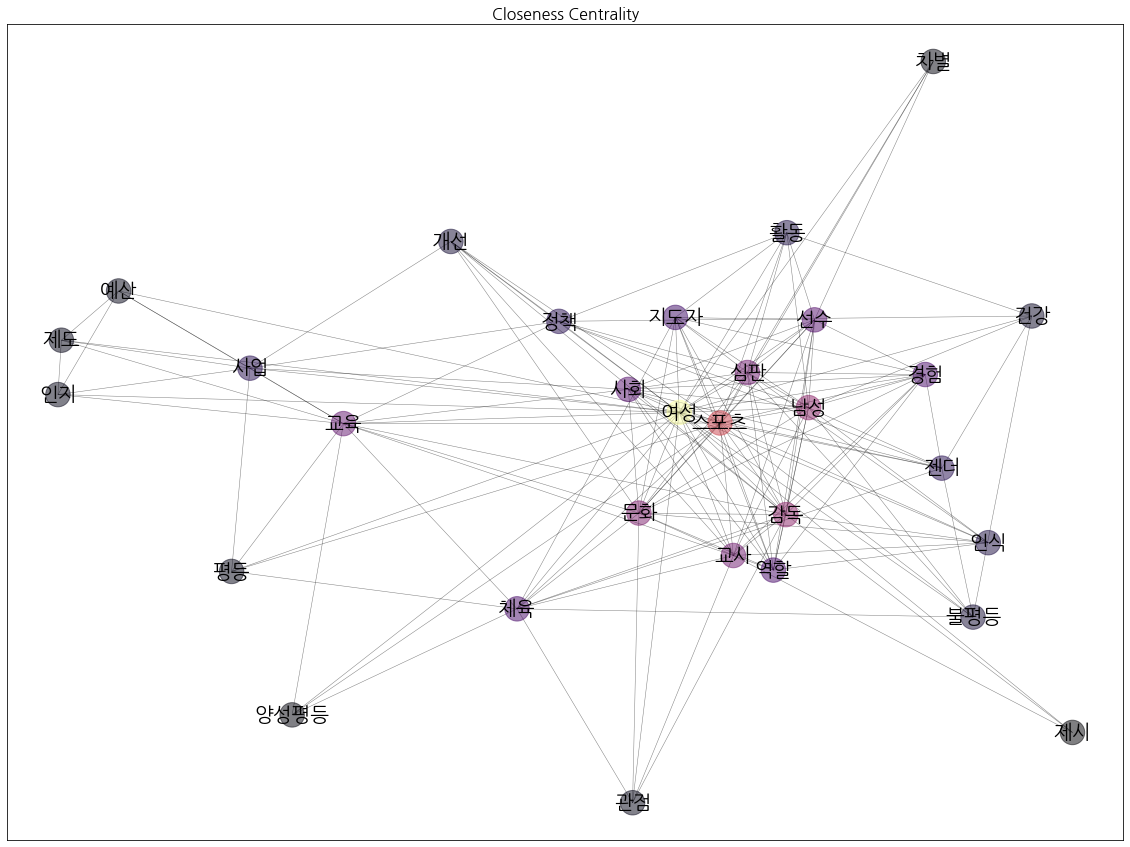

In [54]:
# Plot the centrality of the nodes
plt.figure(figsize=(20, 15))

my_font_prop = fm.FontProperties(fname=FONT_PATH, size=20)


nx.draw_networkx_nodes(
    G, 
    pos, 
    node_size=600, 
    cmap = plt.get_cmap('inferno'), 
    node_color = list(c_closeness.values()),
    alpha=0.5,# node transparency
)
nx.draw_networkx_labels(
    G, 
    pos,
    #font_weight='bold',
    #font_color = 'black',
    font_family=my_font_prop.get_name(),
    font_size=20,
)
nx.draw_networkx_edges(
    G, 
    pos, 
    alpha=0.5,# edge transparency
    width=0.5 # width of edge(line), float or array of floats (default=1.0)
)


# Closeness Centrality
#nx.draw(
#    G, 
#    pos=pos, 
#    cmap = plt.get_cmap('inferno'), 
#    node_color = list(c_closeness.values()), 
#    node_size=500, 
#    with_labels=True,
#    font_family=my_font_prop.get_name(),
#    font_size=20,
#    alpha=0.5,# node & edge transparency
#    width=0.5 # width of edge(line), float or array of floats (default=1.0)
#)

plt.title(
    'Closeness Centrality', 
    size=16
)

### 3-2-6. Betweenness Centrality

In [55]:
c_betweenness = nx.betweenness_centrality(G)
#pd.DataFrame(
#    data=list( c_betweenness.values() ), 
#    index=list( c_betweenness.keys() ), 
#    columns=["중심성"]
#).to_excel(current_path + "/result/" + "Betweenness_centrality_dbpia_en_" + now_str + ".xlsx" )
c_betweenness

{'감독': 0.03157596371882086,
 '개선': 0.004292751583391978,
 '경험': 0.003854875283446712,
 '관점': 0.0,
 '교사': 0.02410860896082571,
 '교육': 0.04528501055594652,
 '남성': 0.03200113378684807,
 '문화': 0.01926069278286027,
 '사회': 0.01379896786300727,
 '선수': 0.0092911877394636,
 '스포츠': 0.07626280397216358,
 '심판': 0.022631753850965674,
 '여성': 0.3258347016967706,
 '역할': 0.002069160997732426,
 '인식': 0.00024630541871921186,
 '제시': 0.0,
 '지도자': 0.004354327938071781,
 '체육': 0.02166119321291735,
 '사업': 0.014514426460239267,
 '정책': 0.013699272812573304,
 '건강': 0.0014778325123152713,
 '불평등': 0.0028764954257565097,
 '젠더': 0.007644264602392681,
 '활동': 0.00421064977715224,
 '양성평등': 0.0,
 '예산': 0.0,
 '인지': 0.0,
 '제도': 0.0,
 '평등': 0.0013136288998357964,
 '차별': 0.0}

In [56]:
c_betweenness_df=pd.DataFrame.from_dict(
    data=c_betweenness
    , orient='index'
    , columns=['betweenness']
).sort_values(by=['betweenness'], ascending=False)

c_betweenness_df.to_excel(current_path + "/result/" + "Betweenness_centrality_naver_21_22" + now_str + ".xlsx" )

c_betweenness_df

,betweenness
여성,0.325835
스포츠,0.076263
교육,0.045285
남성,0.032001
감독,0.031576
교사,0.024109
심판,0.022632
체육,0.021661
문화,0.019261
사업,0.014514


Text(0.5, 1.0, 'Betweenness Centrality')

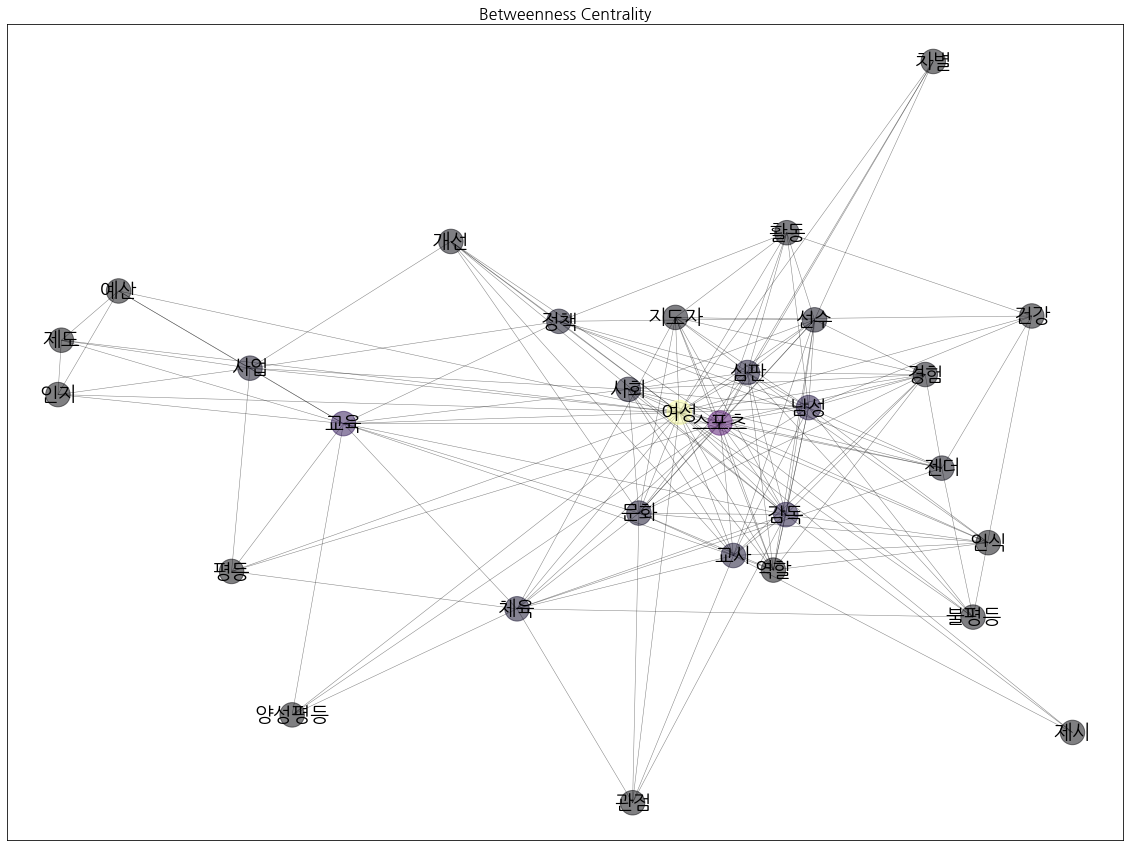

In [57]:
# Betweenness Centrality

plt.figure(figsize=(20, 15))

my_font_prop = fm.FontProperties(fname=FONT_PATH, size=20)


nx.draw_networkx_nodes(
    G, 
    pos, 
    node_size=600, 
    cmap = plt.get_cmap('inferno'), 
    node_color = list(c_betweenness.values()),
    alpha=0.5,# node transparency
)
nx.draw_networkx_labels(
    G, 
    pos,
    #font_weight='bold',
    #font_color = 'black',
    font_family=my_font_prop.get_name(),
    font_size=20,
)
nx.draw_networkx_edges(
    G, 
    pos, 
    alpha=0.5,# edge transparency
    width=0.5 # width of edge(line), float or array of floats (default=1.0)
)


#nx.draw(
#    G, 
#    pos=pos, 
#    cmap = plt.get_cmap('inferno'), 
#    node_color = list(c_betweenness.values()),
#    node_size=500, 
#    with_labels=True,
#    font_family=my_font_prop.get_name(),
#    font_size=20,
#    alpha=0.5,# node & edge transparency
#    width=0.5 # width of edge(line), float or array of floats (default=1.0)
#)


#axarr[1].set_title('Betweenness Centrality', size=16)
plt.title(
    'Betweenness Centrality', 
    size=16
)

## 3-3. 군집화 알고리즘(Community detection Louvain based)

divisive algorithm, 네트워크가 분열되도록 inter-community, 즉 community간 link를 잘라나가는 방법이다. inter-community link를 추정하는 대표적인 방법이 link의 betweenness 중심성을 조사하는 방법으로, Girvan-Newman algorithm이 이와 같은 방법을 사용

agglomerative algorithm, 비슷한 노드/커뮤니티를 점진적으로 합쳐나가는 방법이다. 주로, clustering기법을 사용하며 이전에 소개한 link community 법이나, fast greedy algorithm 같은 방법

Louvain algorithm은 한개의 node로부터 주변 node들을 흡수하며 community를 생성해 나간다는 것은 greedy법과 비슷하지만, 두 가지 개선책을 적용하고 있다. 하나는 개선된 modularity 계산법, 둘은 network의 계층적 구조를 이용하는 방법

Text(0.5, 1.0, 'Community Louvain Graph')

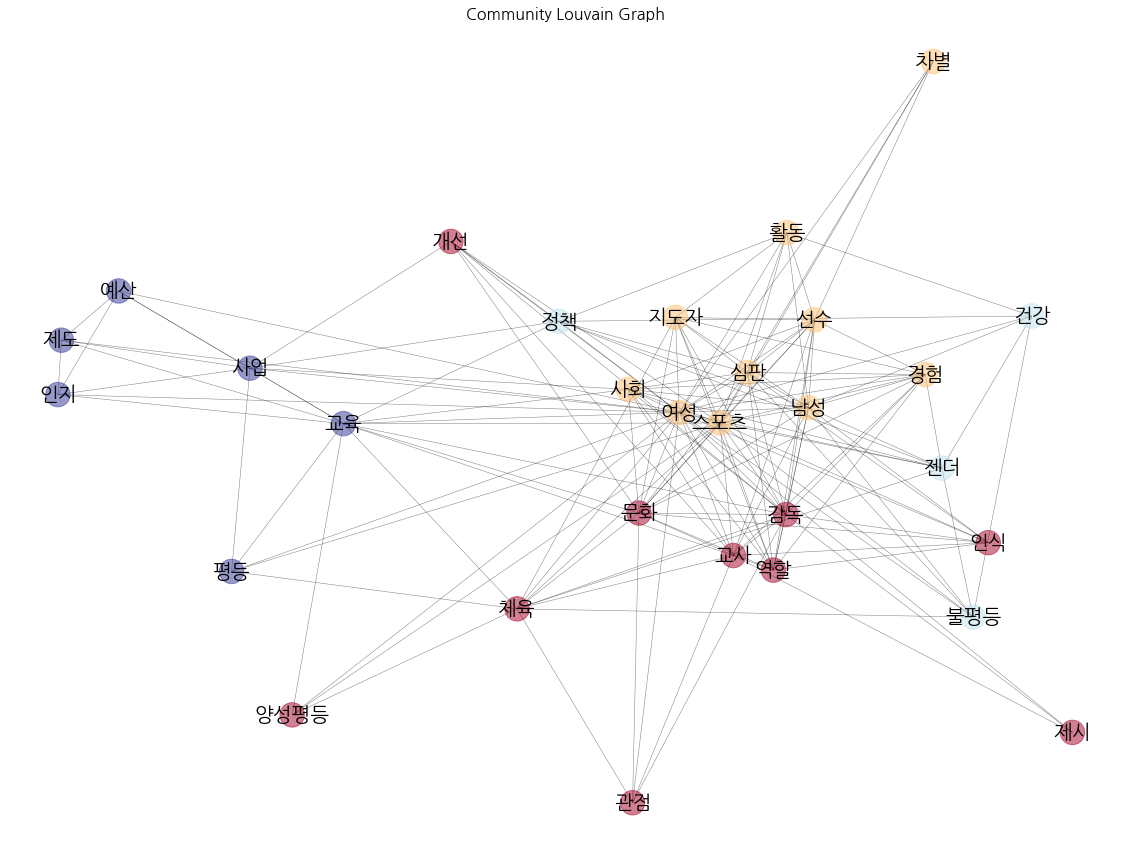

In [58]:
import community.community_louvain

partition = community.community_louvain.best_partition(G)
#pos = nx.spring_layout(G)
#plt.figure(figsize=(25, 25))
plt.figure(figsize=(20, 15))
plt.axis('off')


my_font_prop = fm.FontProperties(fname=FONT_PATH, size=18)


nx.draw_networkx_nodes(
    G, 
    pos, 
    node_size=600, 
    cmap=plt.cm.RdYlBu, 
    node_color=list(partition.values()),
    alpha=0.5,# node & edge transparency
)
nx.draw_networkx_labels(
    G, 
    pos,
    #font_weight='bold',
    #font_color='orangered',
    font_family=my_font_prop.get_name(),
    font_size=20,
)
nx.draw_networkx_edges(
    G, 
    pos, 
    alpha=0.5,# edge transparency
    width=0.5 # width of edge(line), float or array of floats (default=1.0)
)

plt.title(
    'Community Louvain Graph', 
    size=16
)

## 3-4. Minimal Spanning Tree

In [59]:
mst=nx.algorithms.tree.minimum_spanning_edges(G, algorithm="prim", data=False)
mst

<generator object prim_mst_edges at 0x7faef59aaad0>

In [60]:
mst_edge_list=list(mst)
sorted(mst_edge_list)

[('감독', '교육'),
 ('감독', '체육'),
 ('개선', '문화'),
 ('개선', '사업'),
 ('개선', '정책'),
 ('관점', '교사'),
 ('교사', '제시'),
 ('남성', '건강'),
 ('문화', '관점'),
 ('문화', '지도자'),
 ('사업', '평등'),
 ('스포츠', '개선'),
 ('스포츠', '불평등'),
 ('스포츠', '역할'),
 ('스포츠', '인식'),
 ('스포츠', '차별'),
 ('스포츠', '활동'),
 ('양성평등', '스포츠'),
 ('여성', '양성평등'),
 ('여성', '예산'),
 ('여성', '인지'),
 ('여성', '제도'),
 ('역할', '경험'),
 ('역할', '사회'),
 ('정책', '남성'),
 ('지도자', '감독'),
 ('차별', '선수'),
 ('차별', '심판'),
 ('체육', '젠더')]

Text(0.5, 1.0, 'Minimal spanning tree')

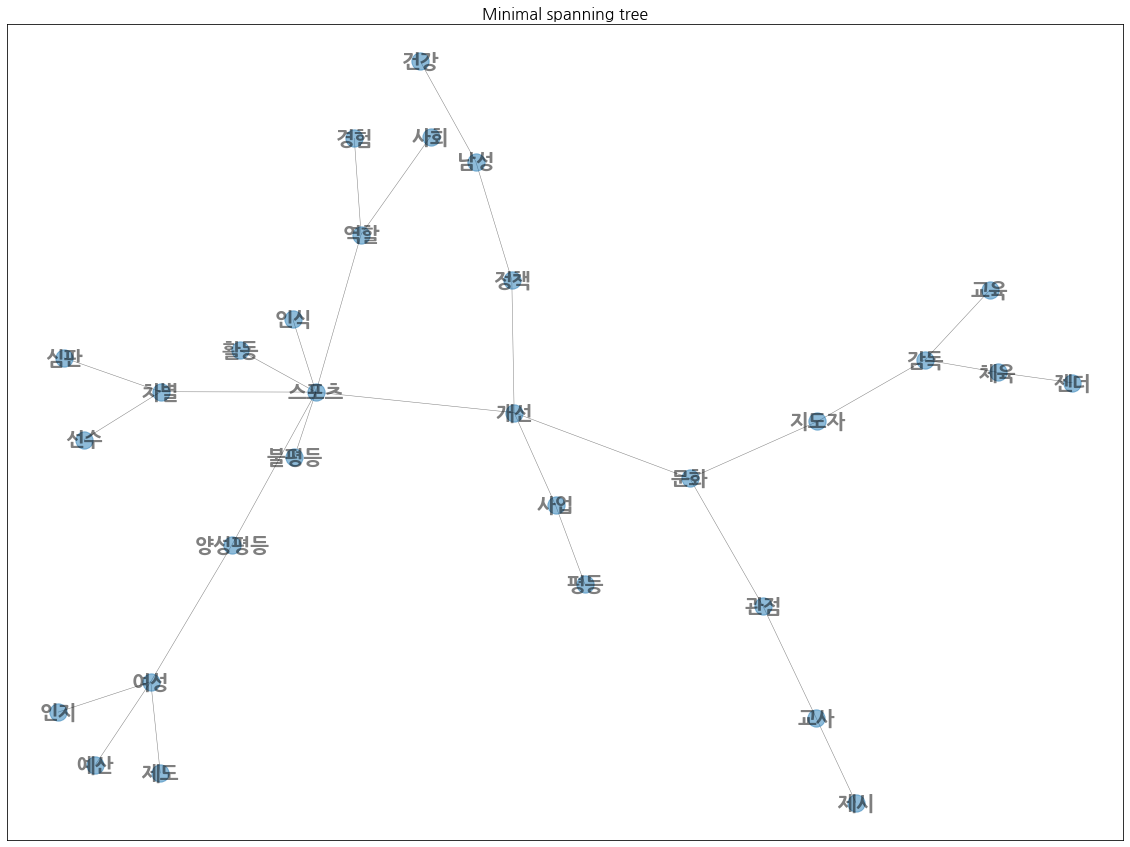

In [61]:
my_font_prop = fm.FontProperties(fname=FONT_PATH, size=16)

plt.figure(figsize=(20,15))

mst_G=nx.Graph()
mst_G.add_edges_from(mst_edge_list)

#nx.draw_networkx_nodes(
#    G=mst_G, 
#    pos=pos,
#    node_size=600, 
#    node_color='skyblue',
#    alpha=0.5,# node transparency
#)
#nx.draw_networkx_labels(
#    G=mst_G,
#    pos=pos,
#    font_weight='bold',
#    font_color = 'black',
#    font_family=my_font_prop.get_name(),
#    font_size=20,
#)
#nx.draw_networkx_edges(
#    G=mst_G,  
#    pos=pos,
#    alpha=0.5,# edge transparency
#    width=0.5 # width of edge(line), float or array of floats (default=1.0)
#)


nx.draw_networkx(
    mst_G,
    with_labels=True,
    font_family=my_font_prop.get_name(),
    font_size=20,
    font_weight='bold',
    alpha=0.5,# node & edge transparency
    width=0.5 # width of edge(line), float or array of floats (default=1.0)
)


plt.title(
    'Minimal spanning tree', 
    size=16
)

# 4. TF-IDF analysis

In [62]:
NN_words_converted

['군대 위계질서 폐쇄 특성 인해 성희롱 발생 제기 집단 국방부 다각도 대응 방안 제시 대부분 성폭력 중점 국방부 차원 실태 장병 성희롱 인식 장병 성희롱 인식 개선 방안 모색 장병 설문 일상 긴장 음주 회식 성희롱 인식 평등 공감 능력 성희롱 인식 토대 장병 일상 긴장 여가 활동 시행 평등 교육 프로그램 개발 공감 능력 음악 미술 스포츠 활용 프로그램 도입 시행 장병 의견 고려 음주 회식 문화 활성 방안 수립 제안',
 '학생 운동선수 스포츠 성폭력 인식 평가 영역 개발 구체 성폭력 인식 선행 고찰 성폭력 인식 평가 요소 탐색 학생 운동선수 평가 영역 세부 평가 제안 국내 대학생 성폭력 인식 문헌 개략 성폭력 인식 평가 탐색 전문가 집단 스포츠 성폭력 인식 평가 영역 세부 개념 도출 학생 선수 스포츠 성폭력 인식 평가 영역 성폭력 인식 성폭력 상황 인지 성폭력 예방 대처 평등 영역 각각 평가 영역 세부 평가 도출',
 '미투 운동 문화예술 인권 보호 제도 흐름 점검 개선 방향 제안 목표 정부 정부 합동 대책 문화예술 성희롱 성폭력 조사단 권고 문화 체육 관광부 성희롱 성폭력 예방 대책 위원회 권고 문화 비전 발표 토대 문화예술 인권 보호 제도 설계 시행 제도 구체 피해자 보호 가해자 제재 예방 방지책 마련 근거 제도 개선 범주 분류 정부 다각 노력 현장 제도 실효 비판 제기 피해 당사자 목소리 평등 문화 정책 진척 지금 현장 변화 현행 제도 진단 개선 방향 논의 시점 정부 발간 기반 문헌 정책 기획 실행 단계 행위자 인터뷰 바탕 면접 진행 인터뷰 질적 연구 프로그램 활용 제도 범주 문제점 문제 해결 인터뷰 제시 개선 방향 연관 관계 확인 인권 보호 제도 유기 연결 효과 시사',
 '서론 인지 예산 제도 성장 제도 측면 정책 기반 제도 선진 인지 예산 제도 시행 가시 제도 실효 지적 인해 실효 제도 오인 제도 도입 상기 시점 정부 예산 효율 성별 형평 제고 정부 예산 사업 평가 성인 지적 접근 정부 예산 성별 고려 형평 증대 인지 예산 제도 제도 성별 수혜 격

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

#corpus = [
#  '먹고 싶은 사과',
#  '먹고 싶은 바나나',
#  '길고 노란 바나나 바나나',
#  '저는 과일이 좋아요'
#]

#tfidfv = TfidfVectorizer(
#            analyzer='word'
#            , stop_words = stop_words_list
#        ).fit(NN_words_converted)

tfidfv=TfidfVectorizer().fit(NN_words_converted)
#tfidfv=TfidfVectorizer().fit(corpus)

print(tfidfv.vocabulary_)
#print(tfidfv.transform(corpus).toarray())
print(tfidfv.transform(NN_words_converted).toarray())

{'군대': 202, '위계질서': 900, '폐쇄': 1407, '특성': 1375, '인해': 1008, '성희롱': 660, '발생': 457, '제기': 1143, '집단': 1256, '국방부': 197, '다각도': 319, '대응': 340, '방안': 468, '제시': 1149, '대부분': 337, '성폭력': 657, '중점': 1210, '차원': 1265, '실태': 753, '장병': 1061, '인식': 995, '개선': 54, '모색': 413, '설문': 632, '일상': 1017, '긴장': 274, '음주': 940, '회식': 1526, '평등': 1401, '공감': 117, '능력': 317, '토대': 1356, '여가': 806, '활동': 1518, '시행': 732, '교육': 166, '프로그램': 1421, '개발': 50, '음악': 939, '미술': 435, '스포츠': 708, '활용': 1521, '도입': 359, '의견': 944, '고려': 100, '문화': 429, '활성': 1519, '수립': 688, '제안': 1150, '학생': 1439, '운동선수': 885, '평가': 1398, '영역': 844, '구체': 190, '선행': 626, '고찰': 114, '요소': 872, '탐색': 1351, '세부': 664, '국내': 194, '대학생': 346, '문헌': 428, '개략': 49, '전문가': 1092, '개념': 48, '도출': 362, '선수': 622, '상황': 606, '인지': 1004, '예방': 849, '대처': 343, '각각': 21, '미투': 436, '운동': 883, '문화예술': 430, '인권': 987, '보호': 510, '제도': 1144, '흐름': 1538, '점검': 1111, '방향': 472, '목표': 418, '정부': 1119, '합동': 1455, '대책': 342, '조사단': 1161, '권고': 205, '

In [64]:
tfidf_word_count = pd.DataFrame({
    '단어': tfidfv.get_feature_names(),
    #'TF-IDF': tfidfv.transform(corpus).sum(axis=0).flat
    'TF-IDF': tfidfv.transform(NN_words_converted).sum(axis=0).flat
})


tmp_df_1=tfidf_word_count.sort_values(by='TF-IDF', ascending=False)
tmp_df_1["단어"]=tmp_df_1["단어"].astype(str)
tmp_df_1.head(my_max_feature)

,단어,TF-IDF
812,여성,4.584079
1293,체육,3.602711
708,스포츠,3.557309
1159,젠더,2.737832
166,교육,2.242170
288,남성,2.096780
578,사회,1.871716
622,선수,1.737287
762,심판,1.724475
154,관점,1.687846


In [65]:
tmp_df_2=tmp_df_1[:my_max_feature]

tmp_df_2.to_excel(current_path + "/result/" + 'tf-idf_naver_21_22' + now_str + ".xlsx")

tmp_df_2

,단어,TF-IDF
812,여성,4.584079
1293,체육,3.602711
708,스포츠,3.557309
1159,젠더,2.737832
166,교육,2.242170
288,남성,2.096780
578,사회,1.871716
622,선수,1.737287
762,심판,1.724475
154,관점,1.687846


# 5. Topic modeling

## 5-1. 확률론적 언어 모형
<br>
<p>
확률론적 언어 모형(Probabilistic Language Model)은 𝑚개의 단어 𝑤1,𝑤2,…,𝑤𝑚 열(word sequence)이 주어졌을 때 문장으로써 성립될 확률 𝑃(𝑤1,𝑤2,…,𝑤𝑚) 을 출력함으로써 이 단어 열이 실제로 현실에서 사용될 수 있는 문장(sentence)인지를 판별하는 모형이다.

이 확률은 각 단어의 확률과 단어들의 조건부 확률을 이용하여 다음과 같이 계산할 수 있다.
</p>
$$
\begin{split}
\begin{eqnarray}
P(w_1, w_2, \ldots, w_m) &=& P(w_1, w_2, \ldots, w_{m-1}) \cdot P(w_m\;|\; w_1, w_2, \ldots, w_{m-1}) \\
&=& P(w_1, w_2, \ldots, w_{m-2}) \cdot P(w_{m-1}\;|\; w_1, w_2, \ldots, w_{m-2}) \cdot P(w_m\;|\; w_1, w_2, \ldots, w_{m-1}) \\
&=& P(w_1) \cdot P(w_2 \;|\; w_1) \cdot  P(w_3 \;|\; w_1, w_2) P(w_4 \;|\; w_1, w_2, w_3) \cdots P(w_m\;|\; w_1, w_2, \ldots, w_{m-1})
\end{eqnarray}
\end{split}
$$

<p>
여기에서 𝑃(𝑤𝑚|𝑤1,𝑤2,…,𝑤𝑚−1) 은 지금까지 𝑤1,𝑤2,…,𝑤𝑚−1라는 단어 열이 나왔을 때, 그 다음 단어로 𝑤𝑚이 나올 조건부 확률을 말한다. 여기에서 지금까지 나온 단어를 문맥(context) 정보라고 한다.
</p>
<br>(출처:https://datascienceschool.net/)

### 5-1-1. unigram
만약 모든 단어의 활용이 완전히 서로 독립이라면 단어 열의 확률은 다음과 같이 각 단어의 확률의 곱이 된다. 이러한 모형을 유니그램 모형이라고 한다.
<br>(출처:https://datascienceschool.net/)
$$
P(w_1, w_2, \ldots, w_m) = \prod_{i=1}^m P(w_i)
$$

### 5-1-2. bigram
만약 단어의 활용이 바로 전 단어에만 의존한다면 단어 열의 확률은 다음과 같다. 이러한 모형을 바이그램 모형 또는 마코프 모형(Markov Model)이라고 한다.
<br>(출처:https://datascienceschool.net/)
$$
P(w_1, w_2, \ldots, w_m) = P(w_1) \prod_{i=2}^{m} P(w_{i}\;|\; w_{i-1})
$$

### 5-1-3. n-gram
만약 단어의 활용이 바로 전 𝑛−1개의 단어에만 의존한다면 단어 열의 확률은 다음과 같다. 이러한 모형을 N그램 모형이라고 한다.
<br>(출처:https://datascienceschool.net/)
$$
P(w_1, w_2, \ldots, w_m) = P(w_1) \prod_{i=n}^{m} P(w_{i}\;|\; w_{i-1}, \ldots, w_{i-n})
$$

## Topic modeling - based on unigram

In [66]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim.models.callbacks import PerplexityMetric
from gensim.models.coherencemodel import CoherenceModel


import pickle
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

/usr/local/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_least_angle.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_least_angle.py:164: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifi

In [67]:
NN_words[:10]

[['군대',
  '위계질서',
  '폐쇄',
  '특성',
  '인해',
  '성희롱',
  '발생',
  '제기',
  '집단',
  '국방부',
  '다각도',
  '대응',
  '방안',
  '제시',
  '대부분',
  '성폭력',
  '중점',
  '국방부',
  '차원',
  '실태',
  '장병',
  '성희롱',
  '인식',
  '장병',
  '성희롱',
  '인식',
  '개선',
  '방안',
  '모색',
  '장병',
  '설문',
  '일상',
  '긴장',
  '음주',
  '회식',
  '성희롱',
  '인식',
  '평등',
  '공감',
  '능력',
  '성희롱',
  '인식',
  '토대',
  '장병',
  '일상',
  '긴장',
  '여가',
  '활동',
  '시행',
  '평등',
  '교육 프로그램',
  '개발',
  '공감',
  '능력',
  '음악',
  '미술',
  '스포츠',
  '활용',
  '프로그램',
  '도입',
  '시행',
  '장병',
  '의견',
  '고려',
  '음주',
  '회식',
  '문화',
  '활성',
  '방안',
  '수립',
  '제안'],
 ['학생',
  '운동선수',
  '스포츠',
  '성폭력',
  '인식',
  '평가',
  '영역',
  '개발',
  '구체',
  '성폭력',
  '인식',
  '선행',
  '고찰',
  '성폭력',
  '인식',
  '평가',
  '요소',
  '탐색',
  '학생',
  '운동선수',
  '평가',
  '영역',
  '세부',
  '평가',
  '제안',
  '국내',
  '대학생',
  '성폭력',
  '인식',
  '문헌',
  '개략',
  '성폭력',
  '인식',
  '평가',
  '탐색',
  '전문가',
  '집단',
  '스포츠',
  '성폭력',
  '인식',
  '평가',
  '영역',
  '세부',
  '개념',
  '도출',
  '학생',
  '선수',
  '스포츠',
  '성폭력',
  '

In [68]:
len(NN_words)

44

In [69]:
my_nouns_list_for_gensim = NN_words[:]
    
my_nouns_list_for_gensim[:10]

[['군대',
  '위계질서',
  '폐쇄',
  '특성',
  '인해',
  '성희롱',
  '발생',
  '제기',
  '집단',
  '국방부',
  '다각도',
  '대응',
  '방안',
  '제시',
  '대부분',
  '성폭력',
  '중점',
  '국방부',
  '차원',
  '실태',
  '장병',
  '성희롱',
  '인식',
  '장병',
  '성희롱',
  '인식',
  '개선',
  '방안',
  '모색',
  '장병',
  '설문',
  '일상',
  '긴장',
  '음주',
  '회식',
  '성희롱',
  '인식',
  '평등',
  '공감',
  '능력',
  '성희롱',
  '인식',
  '토대',
  '장병',
  '일상',
  '긴장',
  '여가',
  '활동',
  '시행',
  '평등',
  '교육 프로그램',
  '개발',
  '공감',
  '능력',
  '음악',
  '미술',
  '스포츠',
  '활용',
  '프로그램',
  '도입',
  '시행',
  '장병',
  '의견',
  '고려',
  '음주',
  '회식',
  '문화',
  '활성',
  '방안',
  '수립',
  '제안'],
 ['학생',
  '운동선수',
  '스포츠',
  '성폭력',
  '인식',
  '평가',
  '영역',
  '개발',
  '구체',
  '성폭력',
  '인식',
  '선행',
  '고찰',
  '성폭력',
  '인식',
  '평가',
  '요소',
  '탐색',
  '학생',
  '운동선수',
  '평가',
  '영역',
  '세부',
  '평가',
  '제안',
  '국내',
  '대학생',
  '성폭력',
  '인식',
  '문헌',
  '개략',
  '성폭력',
  '인식',
  '평가',
  '탐색',
  '전문가',
  '집단',
  '스포츠',
  '성폭력',
  '인식',
  '평가',
  '영역',
  '세부',
  '개념',
  '도출',
  '학생',
  '선수',
  '스포츠',
  '성폭력',
  '

### 5-1. 전처리

단어 사전 생성

In [70]:
dictionary = corpora.Dictionary(NN_words)
dictionary

In [71]:
#2개의 문서 미만으로 등장하는 단어는 제외, 전체의 5% 이상으로 자주 등장하는 단어는 제외
# data set 사이즈가 너무 작은 필터링 결과가 empty가 될 수 있다.

dictionary.filter_extremes(no_below=30, no_above=0.50)

사전 속의 단어가 문장에서 몇 번 출현하는지 빈도를 세서 벡터화 합니다. 이걸 바로 bag of words라고 하고, 이렇게 구조화된 언어를 코퍼스라고 합니다.

In [72]:
corpus = [dictionary.doc2bow(text) for text in NN_words]
corpus[:10] 

[[], [], [], [], [], [], [], [], [], []]

### 5-2. 최적 토픽 갯수 선정

#### 5-2-1. Perplexity

In [73]:
perplexity_values=list()

for idx in range(2,10) :
    model_perplexity=LdaModel(corpus, num_topics=idx, id2word=dictionary)
    perplexity_values.append(model_perplexity.log_perplexity(corpus))
    
perplexity_values

ValueError: cannot compute LDA over an empty collection (no terms)

In [ ]:
#plt.figure(figsize=(10, 10))

x=range(2,10)

plt.plot(x, perplexity_values)

plt.xlabel("Number of topics")
plt.ylabel("Perplexity score")

#### 5-2-2. Coherence

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):#start=2, step=3)
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
def find_optimal_number_of_topics(dictionary, corpus, processed_data):
    limit = 10;
    start = 2;
    step = 1;

    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_data, start=start, limit=limit, step=step)

    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')

In [ ]:
# 최적의 토픽 수 찾기
find_optimal_number_of_topics(dictionary, corpus, my_nouns_list_for_gensim)

### 5-3. 모델링(using c_v, UMass)

모델의 정확도는 토픽의 일관성으로도 볼 수 있을텐데, 토픽의 일관성은 Coherence를 보면 됩니다. 파라미터 eval_every=1로 설정하여, 매 pass마다 문서의 Convergence 평가하고, 대부분의 문서가 포함되는 pass를 선정할 수도 있습니다.

In [ ]:
perplexity_logger = PerplexityMetric(corpus=corpus, logger='shell')
coherence_logger = CoherenceMetric(corpus=corpus, coherence="u_mass", logger='shell')

lda_model = LdaModel(corpus, id2word=dictionary, num_topics=7, passes=20, callbacks=[coherence_logger, perplexity_logger])

lda_model.print_topics(num_words=10)
#topics = lda_model.print_topics(num_words=20)
#
#for topic in topics:
#    print(topic)

In [ ]:
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=my_nouns_list_for_gensim, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print('\nCoherence Score (c_v) : ', coherence_lda)

In [ ]:
# Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=lda_model, texts=my_nouns_list_for_gensim, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()

print('\nCoherence Score (u_mass) : ', coherence_lda)

In [ ]:
lda_visualization = gensimvis.prepare(
    lda_model
    , corpus
    , dictionary
    , R=10   # Top-'R' Most Relevant Terms for Topic 'N'
    , sort_topics=False
)
lda_visualization

In [ ]:
plt.figure(figsize=(25,20))

pyLDAvis.display(lda_visualization)

### 5-4. 모델링(일반)

In [ ]:
num_topics = 5     # 생성될 토픽의 개수
chunksize = 2000   # 한번의 트레이닝에 처리될 문서의 개수
passes = 20        # 전체 코퍼스 트레이닝 횟수
iterations = 400   # 문서 당 반복 횟수
eval_every = 1

In [ ]:
model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)
model

In [ ]:
top_topics = model.top_topics(corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

pprint(top_topics)

# 시각화

In [ ]:
lda_visualization = gensimvis.prepare(model, corpus, dictionary, sort_topics=False)
lda_visualization

In [ ]:
plt.figure(figsize=(25,20))

pyLDAvis.display(lda_visualization)

LDA 시각화 데이터 파일 저장(html)

In [ ]:
pyLDAvis.save_html(lda_visualization, current_path + "/result/" + 'LDA_naver_21-22' + now_str + ".html")